<a href="https://colab.research.google.com/github/mikislin/summer20-Intro-python/blob/master/07_Matplotlib_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Importing image data into Numpy arrays**
Loading image data is supported by the Pillow library. Natively, Matplotlib only supports PNG images.

download and add to the folder https://drive.google.com/file/d/1uMWMA6m4Kj9QuXpq5aGgL6PCzgueQL9o/view?usp=sharing



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [ ]:
img = mpimg.imread('image_001.png')
print(img)

[[[0.10196079 0.1254902  0.11764706]
  [0.10196079 0.1254902  0.11764706]
  [0.09803922 0.12156863 0.11372549]
  ...
  [0.07843138 0.10196079 0.10196079]
  [0.07843138 0.10196079 0.10196079]
  [0.07843138 0.10196079 0.10196079]]

 [[0.10980392 0.13333334 0.12156863]
  [0.10980392 0.13333334 0.1254902 ]
  [0.10588235 0.12941177 0.12156863]
  ...
  [0.07843138 0.10196079 0.10196079]
  [0.07843138 0.10196079 0.10196079]
  [0.07843138 0.10196079 0.10196079]]

 [[0.11372549 0.13725491 0.13333334]
  [0.10196079 0.1254902  0.12156863]
  [0.09803922 0.12156863 0.11764706]
  ...
  [0.08235294 0.10588235 0.10588235]
  [0.07843138 0.10196079 0.10196079]
  [0.08235294 0.10588235 0.10588235]]

 ...

 [[0.04705882 0.07058824 0.0627451 ]
  [0.04705882 0.07058824 0.0627451 ]
  [0.04705882 0.07058824 0.0627451 ]
  ...
  [0.07450981 0.09803922 0.09803922]
  [0.07450981 0.09803922 0.09803922]
  [0.07450981 0.09803922 0.09803922]]

 [[0.04705882 0.07058824 0.0627451 ]
  [0.05098039 0.07450981 0.06666667]


(750, 500, 3)


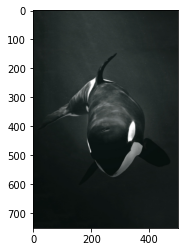

In [ ]:
print(img.shape)
plt.imshow(img)


(750, 500)


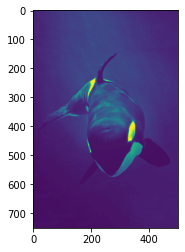

In [ ]:
#Applying pseudocolor schemes to image plots
lum_img = img[:, :, 1]
print(lum_img.shape)
plt.imshow(lum_img)

Matplotlib has a number of built-in colormaps accessible via matplotlib.cm.get_cmap. Colormaps are often split into several categories based on their function

1.   Sequential
2.   Diverging
3.   Cyclic
4.   Qualitative








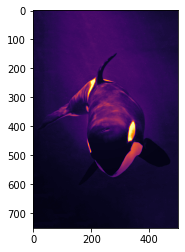

In [ ]:
# apply non default LUT
plt.imshow(lum_img, cmap="inferno")

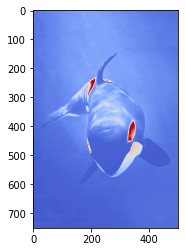

In [ ]:
# use set_cmap()
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('coolwarm')

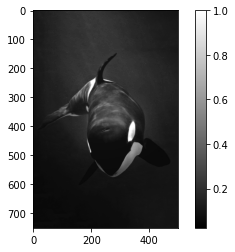

In [ ]:
# add colorbar
imgplot = plt.imshow(lum_img, cmap = 'gray')
plt.colorbar()

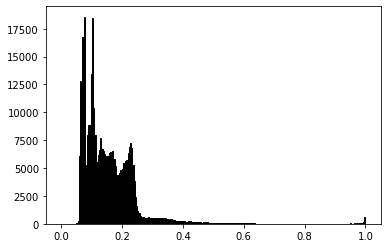

In [ ]:
# gray image histogram
h=plt.hist(lum_img.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

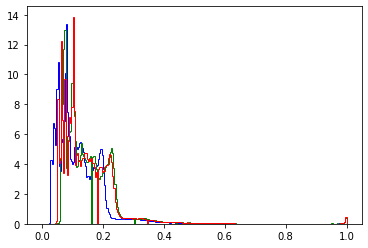

In [ ]:
# color image histogram
color = ('b','g','r')
for i,col in enumerate(color):
    plt.hist(img[:,:,i].ravel(),256,histtype='step', color=col,density=True)

plt.show()


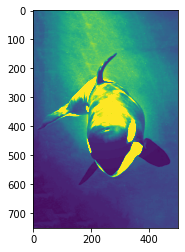

In [ ]:
# contrast by clipping the regions of histogram, set_clim()

h = plt.imshow(lum_img, clim=(0.05, 0.3))

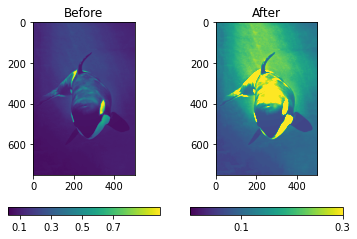

In [ ]:
fig = plt.figure()
a = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(lum_img)
a.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
a = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0, 0.3)
a.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')


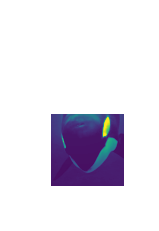

In [ ]:
# clipping image
import matplotlib.patches as patches

fig, ax = plt.subplots()
im = ax.imshow(lum_img)
patch = patches.Rectangle((150, 370), 250, 250, transform=ax.transData)
im.set_clip_path(patch)

ax.axis('off')
plt.show()

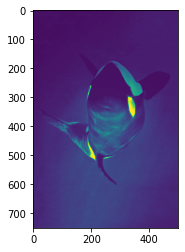

In [ ]:
# up <-> down flip
flip_ud_image = np.flipud(lum_img)
plt.imshow(flip_ud_image)

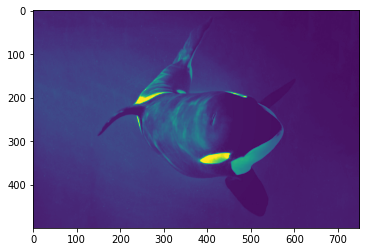

In [ ]:
# transpose
plt.imshow(lum_img.T)

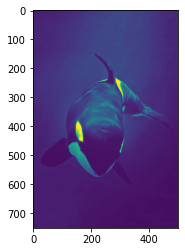

In [ ]:
# mirror the image in x direction
plt.imshow(lum_img[:,::-1]); 

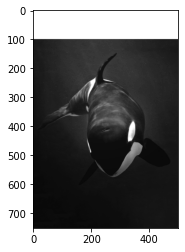

In [ ]:
# set the pixels on the first 100 rows white
lum_img2 = lum_img.copy()    
lum_img2[0:100, :] = 1.0 
plt.imshow(lum_img2,cmap='gray');

In [ ]:
# create a function that returns a copy of the image
# so that it fades to black as we bottom to top
def fadex(image):
    height, width = image.shape
    m=np.linspace(0,10,height).reshape(height,1)
    result = image*m 
    return result

(750, 500)


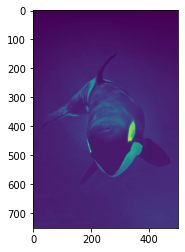

In [ ]:
modified=fadex(lum_img)
print(modified.shape)
plt.imshow(modified);

(0.5, 499.5, 0.5, 749.5)

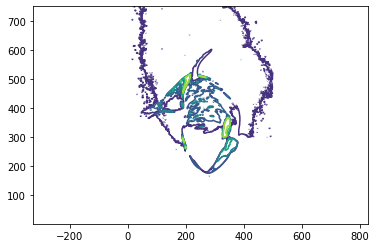

In [ ]:
# Find image contour of the grayscale image
plt.contour(lum_img,origin = "image")
plt.axis('equal')

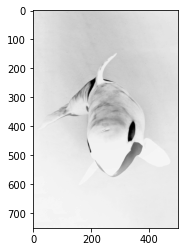

In [ ]:
#Grayscale Transformation
img2 = 1-lum_img
plt.imshow(img2, cmap='gray')

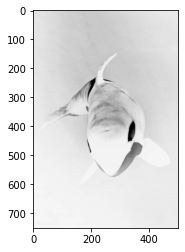

In [ ]:
#adding a constant
img3 = img2 * (100/255) + 100
plt.imshow(img3, cmap='gray')

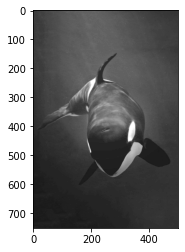

In [ ]:
img4 = 255*(lum_img/255.0)**0.5
plt.imshow(img4, cmap='gray')

###**Histogram Equalization**
Let's try histogram equalization on a dark image. The transform flattens the gray-level histogram so that all intensities are as equally common as possible. The transform function is a cumulative distribution function (cdf) of the pixel values in the image (normalized to map the range of pixel values to the desired range).

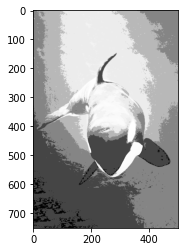

In [ ]:
# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
img5 = histeq(img4)
plt.imshow(img5, cmap='gray')

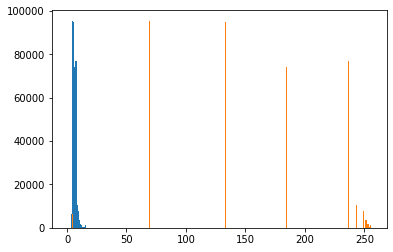

In [ ]:
plt.hist(img4.ravel(),bins = 256, range = [0, 256])
plt.hist(img5.ravel(),bins = 256, range = [0, 256])
plt.show()

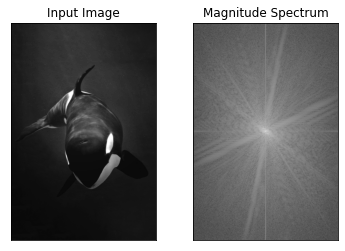

In [ ]:
# Transform the image to frequency domain
fimg = np.fft.fft2(lum_img)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(fimg)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(lum_img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

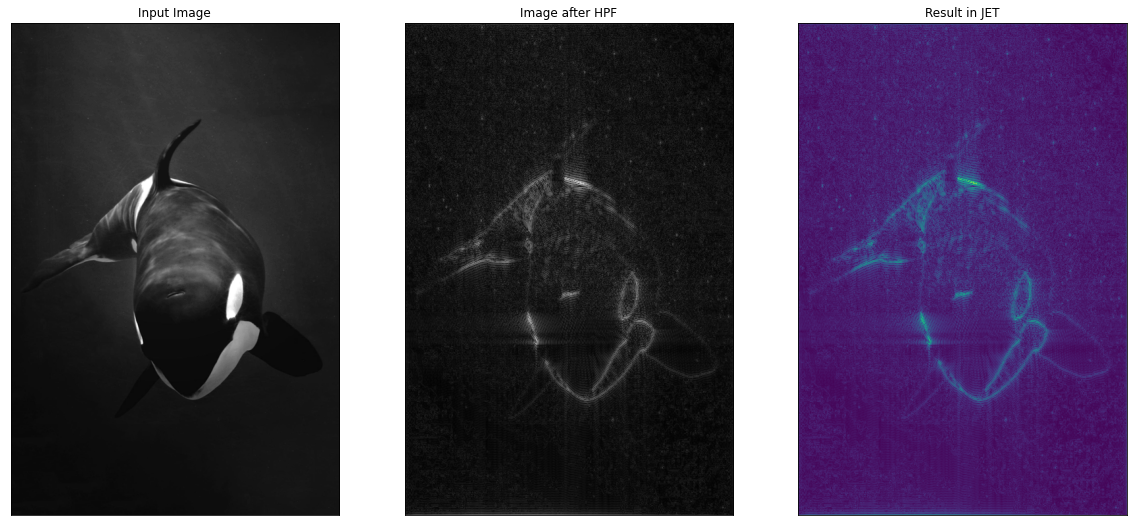

In [ ]:
# Finding Edges by Highpass Filtering in FFT
rows, cols = lum_img.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(lum_img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back**0.5, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back**0.5)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

###**Saving Figures to File**
The list of supported file types can be found for your system by using the following method of the figure canvas object `fig.canvas.get_supported_filetypes()`

Save A Plot To An Image File

In [ ]:
# Save Figure
plt.savefig("image01.png")

# Save Transparent Figure
plt.savefig("image02.png", transparent=True)

Save A Plot To A Pdf File


In [ ]:
# Import PdfPages
from matplotlib.backends.backend_pdf import PdfPages

# Initialize the pdf file
pp = PdfPages('multipage.pdf')

# Save the figure to the file
pp.savefig()

# Close the file
pp.close()

###**Animation**


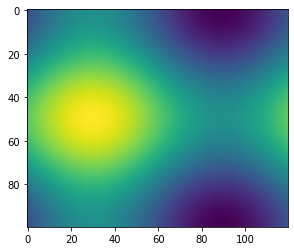

In [ ]:
from matplotlib import animation, rc
from IPython.display import HTML

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)
rc('animation', html='jshtml')
anim